# Projet 6 : Classifiez automatiquement des biens de consommation
Dans ce notebook nous anlysons les données textuelles de la la base de donnes  nous réondrons aux question suivantes

* **Réalisez au préalable un prétraitement de vos textes** : nettoyage, stemming, lemmatization etc. 
* **Utilisez des méthodes basiques d’encodage de texte** (Bag of Words, TfIdf etc.)
* **Utilisez des méthodes de réduction de dimension sur le texte encodé et comparer les résultats avec les catégories réel**

## Dans cette parti pour améliorer les resulatt des clustering et de la classification nous supprimons les mots les plus fréquent qui semblent biaiser les alnalyses faitees dans le notebook fkamga_prétraitement_text.ipynb

## Dans ce notebook nous allons explorer et effectuer un premier nettoyage des données en suivant les étapes suivantes

### 1- [Prétraitement du texte](#1)
#### 1.1 [Stemming](#1.1)
#### 1.2 [Lemmatization](#1.2)

### 2- [Encodage de texte](#2)
#### 2.1 [TF-IDF](#2.1)
#### 2.2 [Bag of Words](#2.2)

### 3- [Étude de la classification en utilisant des techniques plus avancées](#3)
#### 3.1 [USE](#3.1)
#### 3.2 [BERT](#3.2)
#### 3.3 [Word2Vec](#3.3)

### 4- [Réduction de dimension sur le texte encodé](#4)


## Initialisation du notebook

In [1]:
%run init.ipynb

Default value for configfile4= config-pc.ini
Default value for verbose= 5

Configuration variable:
verbose= 5
configfile= config-pc.ini
Initial current directory: cwd= wkdir = C:\Users\HSPH9696\formation_OPC\projet6
python relase 3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]
seaborn.__version__= 0.13.2
Sections trouvées dans le fichier de configuration: ['dir', 'time', 'print']

Configuration variables:
basedir =  C:\Users\HSPH9696\formation_OPC\Projet6\
indir =  C:\Users\HSPH9696\formation_OPC\Projet6\in\
wkdir =  C:\Users\HSPH9696\formation_OPC\Projet6\wk\
figdir =  C:\Users\HSPH9696\formation_OPC\Projet6\fig\
outdir =  C:\Users\HSPH9696\formation_OPC\Projet6\out\
pathdir =  C:\Users\HSPH9696\formation_OPC\Projet6\module\
locpath =  C:\Users\HSPH9696\formation_OPC\Projet6\module\
fdt1 =  [%Y/%m/%d - %H:%M:%S]
fdt2 =  %Y-%m-%d %H:%M:%S
week =  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
type(week) =  

## Importation spécifique au notebook

In [2]:
# Traitement du Langage Naturel (NLP)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import spacy

# Manipulation de Chaînes de Caractères
import re
import sidetable
import ast
from sklearn.preprocessing import MultiLabelBinarizer
# Structures de Données
from collections import defaultdict
from collections import OrderedDict

# Traitement Numérique et Algébrique
#from scipy.linalg import triu

# Extraction de Caractéristiques Textuelles
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Téléchargement des ressources nécessaires pour nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Charger le modèle spaCy
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to C:\ProgramData\miniconda3\env
[nltk_data]     s\formation_openC\lib\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\ProgramData\miniconda3
[nltk_data]     \envs\formation_openC\lib\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\ProgramData\miniconda3\e
[nltk_data]     nvs\formation_openC\lib\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Import modules usuels


In [3]:
# base de données tabulaire 
import pandas as pd


# visualisation 

import matplotlib.pyplot as plt
import seaborn as sns 

## Stokage des fichiers obtenues dans le fichier out 

* Nous utilisons la bibliothèque watchdog pour surveiller le répertoire actuel.
* NewFileHandler est une classe qui réagit à la création de nouveaux fichiers.
Lorsqu'un nouveau fichier est créé avec une des extensions spécifiées, il est automatiquement déplacé vers le répertoire 'out'.

In [4]:
from modules import start_watcher


In [5]:
# Configuration
project_directory = os.path.dirname(os.getcwd())  # Remonter d'un niveau
in_directory = os.path.join(project_directory, 'in')
out_directory = os.path.join(project_directory, 'out')
extensions_to_move = ('.csv', '.xlsx', '.xls', '.png', '.jpg', '.jpeg', '.gif')

In [6]:
[project_directory,in_directory,out_directory,extensions_to_move]

['C:\\Users\\HSPH9696\\formation_OPC\\Projet6',
 'C:\\Users\\HSPH9696\\formation_OPC\\Projet6\\in',
 'C:\\Users\\HSPH9696\\formation_OPC\\Projet6\\out',
 ('.csv', '.xlsx', '.xls', '.png', '.jpg', '.jpeg', '.gif')]

### Repertoire courrant 

In [7]:
# Changer le répertoire de travail vers 'in'
os.chdir(in_directory)
print(f"Répertoire de travail actuel : {os.getcwd()}")

# Démarrer l'observateur
observer = start_watcher(in_directory, out_directory, extensions_to_move)
# Quand vous avez terminé et que vous voulez arrêter l'observateur, exécutez :
# observer.stop()
# observer.join()

Répertoire de travail actuel : C:\Users\HSPH9696\formation_OPC\Projet6\in
Observateur démarré. Surveillance du répertoire : C:\Users\HSPH9696\formation_OPC\Projet6\in
Configuration terminée. L'observateur est actif.


In [8]:
in_directory = os.getcwd()
files = os.listdir(in_directory)
files

['.ipynb_checkpoints',
 'acp_bagofwords.png',
 'acp_bagofwords_kmeans.png',
 'acp_tf_idf.png',
 'da.csv',
 'Dataset+projet+prétraitement+textes+images.zip',
 'df.csv',
 'dimesionreduction_tfid.png',
 'flipkart_com-ecommerce_sample_1050.csv',
 'flipkart_com-ecommerce_sample_1050_preprocessed.csv',
 'flipkart_images_preprocessed.pkl',
 'Images',
 'untitled.md',
 'Weather_Images_CNN_Transfer_Learning_Stage_1_feasibility_V1.0.ipynb']

## importation des données 

In [9]:
df= pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')


# Prétraitement du texte 

## Structure des données 


In [10]:


def data_structure(df):
    """
    Analyse la structure des données dans un fichier CSV donné.

    Paramètres:
    - file_path (str): Le chemin vers le fichier CSV à analyser.

    Retourne:
    - tuple: Contient les informations suivantes sur le DataFrame:
      - shape (tuple): La forme du DataFrame (nombre de lignes, nombre de colonnes).
      - num_duplicates (int): Le nombre de lignes en double.
      - description_uniqueness (bool): Indique si toutes les descriptions sont uniques.
      - missing_data (DataFrame): Le nombre de valeurs manquantes pour chaque colonne.
      - data_types (DataFrame): Les types de données et leur fréquence.
      - unique_values (DataFrame): Le nombre de valeurs uniques par colonne.
      - missing_percentage (DataFrame): Le pourcentage de valeurs manquantes par colonne, trié par ordre décroissant.
    """
    
    
    # Analyser la structure des données
    shape = df.shape
    num_duplicates = df.duplicated().sum()
    description_uniqueness = df['description'].nunique() == len(df)
    
    # Créer des DataFrames pour les résultats
    missing_data = pd.DataFrame(df.isnull().sum(), columns=['missing_count'])
    data_types = pd.DataFrame(df.dtypes.value_counts(), columns=['count'])
    unique_values = pd.DataFrame(df.nunique(), columns=['unique_count'])
    missing_percentage = pd.DataFrame(df.isna().mean().sort_values(ascending=False), columns=['missing_percentage'])

    # Afficher les premières lignes du DataFrame
    print("First few rows of the DataFrame:")
    print(df.head(), "\n")
    
    # Afficher les résultats sous forme de DataFrames
    print("Shape of the DataFrame:", shape)
    print("Number of duplicates:", num_duplicates)
    print("Description uniqueness:", description_uniqueness, "\n")
    
    print("Missing data per column:")
    print(missing_data, "\n")
    
    print("Data types and their counts:")
    print(data_types, "\n")
    
    print("Unique values per column:")
    print(unique_values, "\n")
    
    print("Missing data percentage per column:")
    print(missing_percentage, "\n")
    
    # Retourner les résultats sous forme de tuple
    return (shape, num_duplicates, description_uniqueness, missing_data, data_types, unique_values, missing_percentage)

#

In [11]:
# utilisation
results = data_structure(df)


First few rows of the DataFrame:
                            uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOS

In [12]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import spacy
from collections import Counter

# Initialisation des outils
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('names')
nltk.download('wordnet')
spacy_nlp = spacy.load('en_core_web_sm')  # Modèle anglais de spacy

# Initialisation du stemmer et du lemmatiseur
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Liste des articles courts en anglais et autres mots à supprimer
words_to_remove = set(['of', 'for', 'to', 'in', 'at', 'is', 'it', 'a', 'an', 'the'])

# Obtenir tous les stopwords anglais
all_stopwords = set(stopwords.words('english')).union(words_to_remove)

# Fonction pour obtenir les mots les plus fréquents
def get_most_common_words(texts, n=100):
    all_words = [word for text in texts for word in text.split()]
    return set([word for word, _ in Counter(all_words).most_common(n)])

# Fonction de prétraitement
def preprocess_text(text, nlp_model=spacy_nlp):
    # Utiliser spaCy pour le traitement initial
    doc = nlp_model(text.lower())
    
    # Initialiser la liste pour les tokens traités
    processed_tokens = []

    for token in doc:
        # Ignorer les ponctuations, les espaces, les nombres, les stopwords et les noms propres
        if (token.is_punct or token.is_space or token.is_digit or 
            token.is_stop or token.pos_ == 'PROPN' or 
            token.text in all_stopwords):
            continue
        
        # Lemmatisation
        lemma = token.lemma_
        # Stemming
        stemmed = stemmer.stem(lemma)
        
        # Ajouter le token s'il a plus d'un caractère
        if len(stemmed) > 1:
            processed_tokens.append(stemmed)

    return ' '.join(processed_tokens)  # Joindre les tokens traités en une chaîne de texte

# Assurer que la colonne 'description' existe
if 'description' in df.columns:
    # Prétraiter tous les textes
    df['text'] = df['description'].astype(str).apply(preprocess_text)
    
    # Obtenir les mots les plus fréquents après le prétraitement initial
    most_common = get_most_common_words(df['text'], n=100)
    
    # Supprimer les mots les plus fréquents
    df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in most_common]))

    # Sauvegarder le DataFrame avec la nouvelle colonne
    # df.to_csv('flipkart_com-ecommerce_sample_1050_preprocessed.csv', index=False)
    print("Prétraitement terminé et sauvegardé dans 'flipkart_com-ecommerce_sample_1050_preprocessed.csv'.")
else:
    print("La colonne 'description' n'existe pas dans le DataFrame.")

[nltk_data] Downloading package punkt to C:\ProgramData\miniconda3\env
[nltk_data]     s\formation_openC\lib\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\ProgramData\miniconda3
[nltk_data]     \envs\formation_openC\lib\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package names to C:\ProgramData\miniconda3\env
[nltk_data]     s\formation_openC\lib\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to C:\ProgramData\miniconda3\e
[nltk_data]     nvs\formation_openC\lib\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Prétraitement terminé et sauvegardé dans 'flipkart_com-ecommerce_sample_1050_preprocessed.csv'.


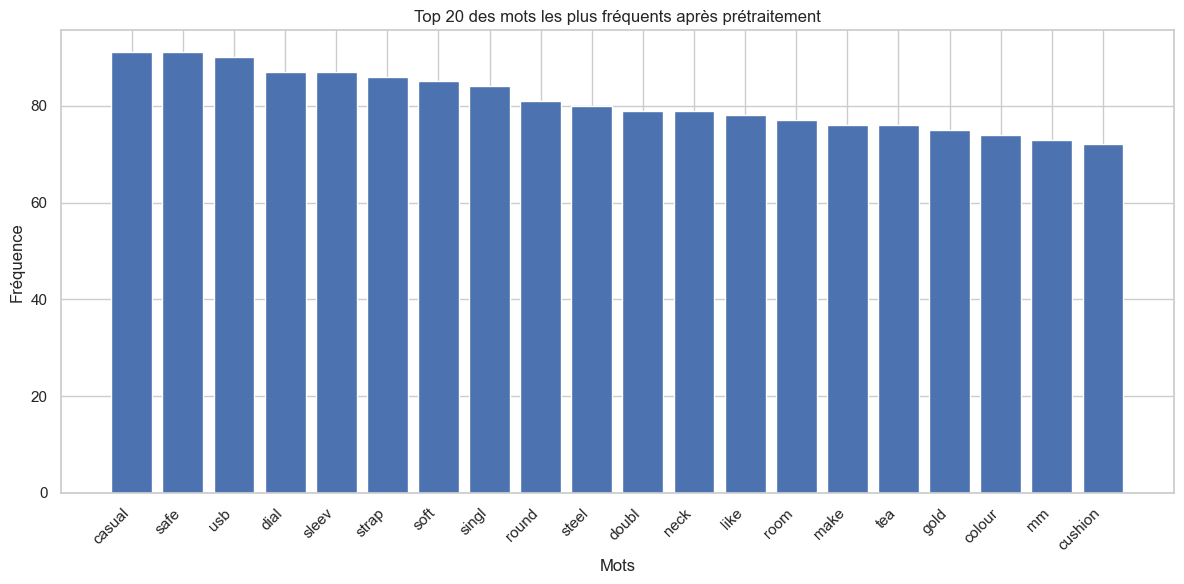

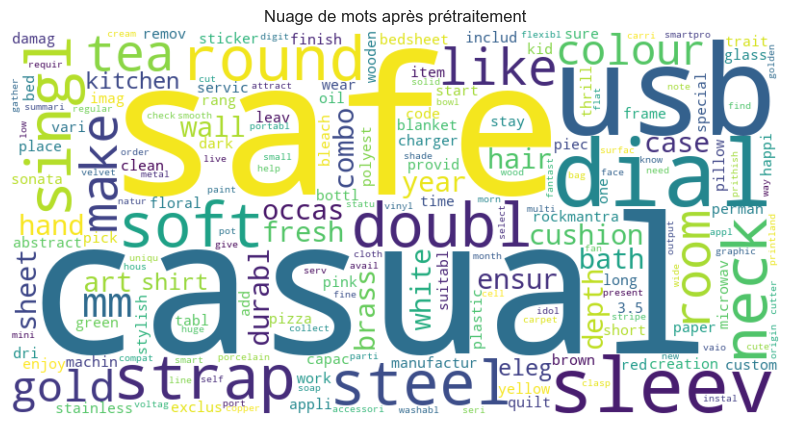

Les 20 mots les plus fréquents après prétraitement :
casual: 91
safe: 91
usb: 90
dial: 87
sleev: 87
strap: 86
soft: 85
singl: 84
round: 81
steel: 80
doubl: 79
neck: 79
like: 78
room: 77
make: 76
tea: 76
gold: 75
colour: 74
mm: 73
cushion: 72


In [59]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

def visualize_most_frequent_words(texts, top_n=20):
    # Compter tous les mots
    all_words = [word for text in texts for word in text.split()]
    word_counts = Counter(all_words)

    # Obtenir les top_n mots les plus fréquents
    top_words = word_counts.most_common(top_n)
    words, counts = zip(*top_words)

    # Créer un graphique à barres
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.title(f"Top {top_n} des mots les plus fréquents après prétraitement")
    plt.xlabel("Mots")
    plt.ylabel("Fréquence")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Créer un nuage de mots
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Nuage de mots après prétraitement")
    plt.show()

# Assurez-vous que la colonne 'text' existe (celle que nous avons créée après le prétraitement)
if 'text' in df.columns:
    visualize_most_frequent_words(data['text'])
else:
    print("La colonne 'text' n'existe pas dans le DataFrame. Assurez-vous d'avoir effectué le prétraitement.")

# Afficher les 20 mots les plus fréquents et leur compte
print("Les 20 mots les plus fréquents après prétraitement :")
all_words = [word for text in data['text'] for word in text.split()]
word_counts = Counter(all_words)
for word, count in word_counts.most_common(20):
    print(f"{word}: {count}")

In [14]:
df.to_csv('1050_preprocessed.csv', index=False)


Copié : 1050_preprocessed.csv vers C:\Users\HSPH9696\formation_OPC\Projet6\out


In [15]:
data = pd.read_csv('1050_preprocessed.csv')

In [17]:
import ast

def extract_main_category(category_tree):
    try:
        # Convertir la chaîne en liste
        categories = ast.literal_eval(category_tree)
        # Prendre la première catégorie et extraire le premier niveau
        main_category = categories[0].split(' >> ')[0]
        return main_category
    except:
        return 'Unknown'

# Créer la colonne 'main_category'
data['main_category'] = data['product_category_tree'].apply(extract_main_category)

In [18]:
data['main_category'].value_counts()

Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: main_category, dtype: int64

## analyse dela longuuer des description


Statistiques de longueur des descriptions originales:
count    1050.000000
mean       76.202857
std        74.851233
min        13.000000
25%        30.000000
50%        44.000000
75%        94.000000
max       587.000000
Name: original_length, dtype: float64

Statistiques de longueur des descriptions prétraitées:
count    1050.000000
mean       24.000000
std        32.294581
min         0.000000
25%         4.000000
50%        10.000000
75%        32.000000
max       234.000000
Name: processed_length, dtype: float64


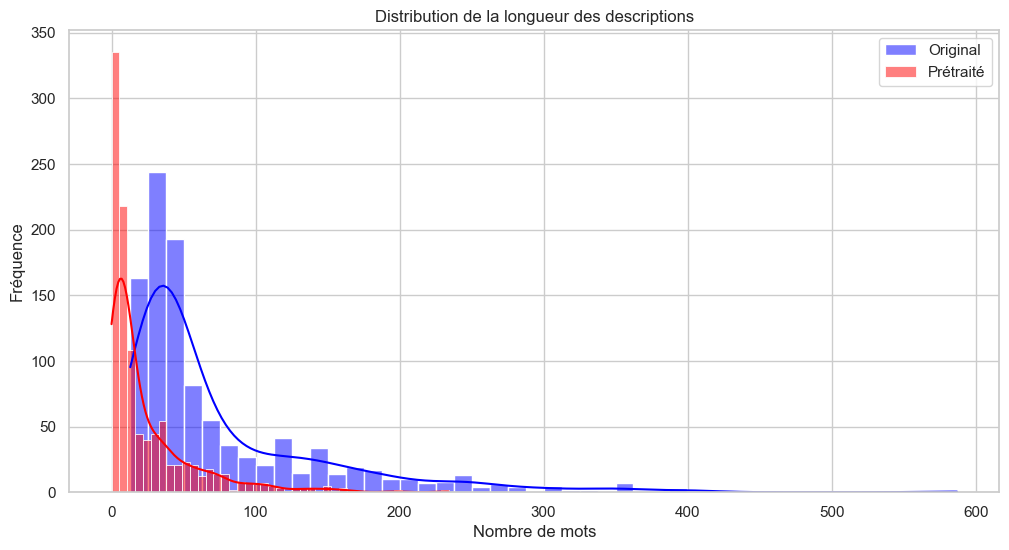

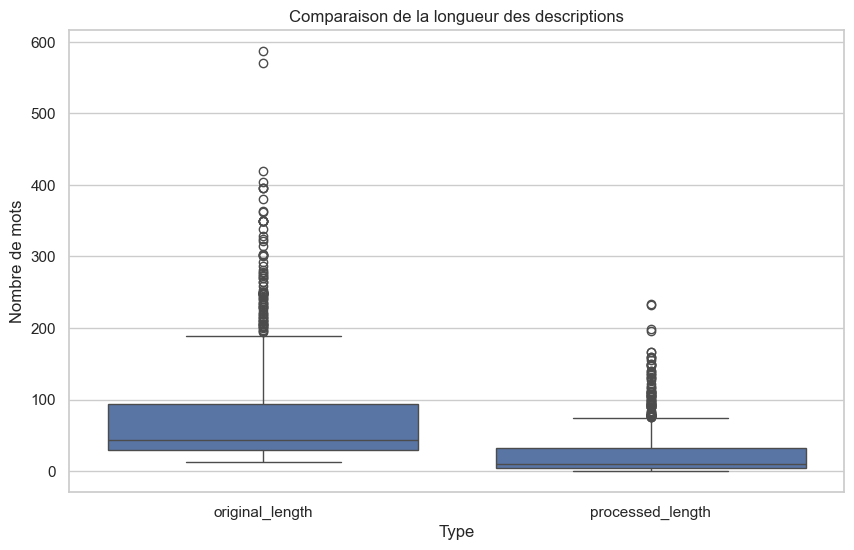


Exemples de descriptions (original vs prétraité):

Original (83 mots): Cotonex Black, White Cotton Kitchen Linen Set (Pack of 2) Price: Rs. 299 Reviews of Cotonex 100% Pur...
Prétraité (16 mots): white review pure glove white code 56213kls215 checker check white machin washabl dri clean bleach g...

Original (203 mots): Key Features of Hako 85W Magsafe Laptop Charger For APPLE MacBook Pro 17 MA897LLA 85 Adapter Designe...
Prétraité (68 mots): magsaf charger appl macbook pro appl macbook pro magsaf 85w magsaf charger appl macbook pro 1,849 ce...

Original (160 mots): Key Features of CALCULUS Baby Boy's Printed Casual Beige Shirt Fit: SLIM Suitable For: Western Wear ...
Prétraité (63 mots): casual beig shirt slim suitabl western wear sleev half sleev beig package:1,calculu casual beig shir...

Original (35 mots): Buy Kaatru Surya Bhagavan Showpiece  -  23.5 cm for Rs.399 online. Kaatru Surya Bhagavan Showpiece  ...
Prétraité (2 mots): 23.5 23.5...

Original (27 mots): Flipkart.com: Buy 

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def analyze_description_length(df):
    # Calculer la longueur des descriptions originales
    df['original_length'] = df['description'].astype(str).apply(lambda x: len(x.split()))
    
    # Calculer la longueur des descriptions prétraitées
    df['processed_length'] = df['text'].apply(lambda x: len(x.split()))
    
    # Afficher les statistiques descriptives
    print("Statistiques de longueur des descriptions originales:")
    print(df['original_length'].describe())
    print("\nStatistiques de longueur des descriptions prétraitées:")
    print(df['processed_length'].describe())
    
    # Créer un histogramme pour comparer les distributions
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='original_length', kde=True, color='blue', alpha=0.5, label='Original')
    sns.histplot(data=df, x='processed_length', kde=True, color='red', alpha=0.5, label='Prétraité')
    plt.title("Distribution de la longueur des descriptions")
    plt.xlabel("Nombre de mots")
    plt.ylabel("Fréquence")
    plt.legend()
    plt.show()
    
    # Créer un boxplot pour comparer les distributions
    plt.figure(figsize=(10, 6))
    df_melted = pd.melt(df[['original_length', 'processed_length']], var_name='Type', value_name='Longueur')
    sns.boxplot(x='Type', y='Longueur', data=df_melted)
    plt.title("Comparaison de la longueur des descriptions")
    plt.ylabel("Nombre de mots")
    plt.show()
    
    # Afficher quelques exemples
    print("\nExemples de descriptions (original vs prétraité):")
    for _, row in df.sample(5).iterrows():
        print(f"\nOriginal ({row['original_length']} mots): {row['description'][:100]}...")
        print(f"Prétraité ({row['processed_length']} mots): {row['text'][:100]}...")

# Assurez-vous que les colonnes 'description' et 'text' existent
if 'description' in df.columns and 'text' in df.columns:
    analyze_description_length(df)
else:
    print("Les colonnes 'description' et 'text' doivent exister dans le DataFrame. Assurez-vous d'avoir effectué le prétraitement.")

In [23]:
from collections import Counter

# Compter les mots uniques en ignorant les valeurs non-string
word_counter = Counter()
for text in data['text']:
    if isinstance(text, str):
        word_counter.update(text.split())

unique_words_count = len(word_counter)

In [24]:
unique_words_count

3864

In [26]:
print(data['text'].isna().sum())

39


In [6]:
df = pd.read_csv("flipkart_com-ecommerce_sample_1050.csv")

In [7]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [8]:
# Exemple d'utilisation des fonctions renommées

# Supposez que vous avez une série pandas contenant des descriptions de produits
corpus = df['description']

# Identifier les mots non informatifs dans le corpus
non_informative_words = identify_non_informative_words(corpus, stem_or_lem='lem', threshold_common=10)

# Appliquer la transformation BoW à chaque description
df['processed_description'] = df['description'].apply(
    lambda x: prepare_bow_representation(x, non_informative_words, stem_or_lem='lem', rejoin=True)
)

# Afficher les premières descriptions transformées
print(df[['description', 'processed_description']].head())


                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                               processed_description  
0  key feature elegance polyester multicolor abst...  
1  specification sathiyas cotton bath towel bath ...  
2  key feature eurospa cotton terry face towel se...  
3  key feature santosh royal fashion cotton print...  
4  key feature jaipur print cotton floral king si...  


In [9]:
import numpy as np
import time
from tqdm import tqdm
from transformers import AutoTokenizer

##########################################
##########################################

# Fonction de préparation des phrases pour BERT

def prepare_bert_inputs(sentences, bert_tokenizer, max_length):
    """
    Prépare les phrases pour l'encodage avec BERT, en générant les input IDs, 
    les token type IDs et les masques d'attention.
    
    Args:
        sentences (list): Liste des phrases à encoder.
        bert_tokenizer (Tokenizer): Le tokenizer BERT utilisé pour l'encodage.
        max_length (int): Longueur maximale des phrases encodées.
        
    Returns:
        tuple: Contient input_ids, token_type_ids, attention_mask, et les inputs BERT complets.
    """
    input_ids = []
    token_type_ids = []
    attention_mask = []
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens=True,
                                              max_length=max_length,
                                              padding='max_length',
                                              return_attention_mask=True,
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf",
                                              verbose=False)

        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0],
                             bert_inp['token_type_ids'][0],
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)

    return input_ids, token_type_ids, attention_mask, bert_inp_tot

##########################################
##########################################

# Fonction de création des features BERT

def extract_bert_features(model, model_type, sentences, max_length, batch_size, mode='HF'):
    """
    Extrait les features des phrases en utilisant BERT.
    
    Args:
        model (BERT Model): Le modèle BERT utilisé pour l'encodage.
        model_type (str): Le type de modèle BERT utilisé (pour le tokenizer).
        sentences (list): Liste des phrases à encoder.
        max_length (int): Longueur maximale des phrases.
        batch_size (int): Taille des batchs pour l'encodage.
        mode (str): 'HF' pour HuggingFace, 'TFhub' pour Tensorflow Hub.
    
    Returns:
        tuple: Les features BERT moyennées sur chaque phrase, ainsi que les états cachés totaux.
    """
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in tqdm(range(len(sentences)//batch_size)):
        idx = step * batch_size
        input_ids, token_type_ids, attention_mask, _ = prepare_bert_inputs(sentences[idx:idx + batch_size],
                                                                           bert_tokenizer, max_length)

        if mode == 'HF':  # BERT HuggingFace
            outputs = model.predict(
                [input_ids, attention_mask, token_type_ids], batch_size=batch_size, verbose=False)
            last_hidden_states = outputs.last_hidden_state

        if mode == 'TFhub':  # BERT Tensorflow Hub
            text_preprocessed = {"input_word_ids": input_ids,
                                 "input_mask": attention_mask,
                                 "input_type_ids": token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']

        if step == 0:
            last_hidden_states_tot = last_hidden_states
        else:
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot, last_hidden_states))

    features_bert = np.array(last_hidden_states_tot).mean(axis=1)

    time2 = np.round(time.time() - time1, 0)
    print("Temps de traitement : ", time2)

    return features_bert, last_hidden_states_tot

##########################################
##########################################

# Fonction de création des features avec USE (Universal Sentence Encoder)

def extract_use_features(sentences, batch_size):
    """
    Extrait les features des phrases en utilisant le modèle Universal Sentence Encoder (USE).
    
    Args:
        sentences (list): Liste des phrases à encoder.
        batch_size (int): Taille des batchs pour l'encodage.
    
    Returns:
        np.ndarray: Les features extraites par le modèle USE.
    """
    time1 = time.time()

    for step in range(len(sentences) // batch_size):
        idx = step * batch_size
        feat = embed(sentences[idx:idx + batch_size])

        if step == 0:
            features = feat
        else:
            features = np.concatenate((features, feat))

    time2 = np.round(time.time() - time1, 0)
    print("Temps de traitement : ", time2)

    return features


In [11]:
import ast

def extract_main_category(category_tree):
    try:
        # Convertir la chaîne en liste
        categories = ast.literal_eval(category_tree)
        # Prendre la première catégorie et extraire le premier niveau
        main_category = categories[0].split(' >> ')[0]
        return main_category
    except:
        return 'Unknown'

# Créer la colonne 'main_category'
df['main_category'] = df['product_category_tree'].apply(extract_main_category)

In [12]:
df['main_category'].value_counts()

main_category
Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: count, dtype: int64

In [13]:
df.columns.tolist()

['uniq_id',
 'crawl_timestamp',
 'product_url',
 'product_name',
 'product_category_tree',
 'pid',
 'retail_price',
 'discounted_price',
 'image',
 'is_FK_Advantage_product',
 'description',
 'product_rating',
 'overall_rating',
 'brand',
 'product_specifications',
 'processed_description',
 'main_category']

In [13]:
raw_corpus = "".join(df["description"].values)

In [14]:
# Tokenisation du corpus
corpus_processed = tokenize_text(raw_corpus)

# Conversion en minuscules
corpus_processed = convert_to_lowercase(corpus_processed)

# Filtrage des stop words
corpus_processed = remove_stopwords(corpus_processed)

# Lemmatisation des mots
corpus_processed = lemmatize_words(corpus_processed)

# Comptage des occurrences de chaque mot
word_counts = pd.Series(corpus_processed).value_counts()

# Affichage des 20 mots les plus fréquents
word_counts.head(20).reset_index()


,index,count
0,product,863
1,free,618
2,delivery,567
3,shipping,564
4,genuine,564
5,cash,564
6,price,561
7,replacement,559
8,day,553
9,buy,547


In [15]:
# Liste manuelle des mots non informatifs
lst_stop_word_manual_lem = ['r', 'key', 'product', 'feature', 'color', "type",
                             'specification', 'material', 'general',
                             'sale', 'number', 'warranty', 'detail',
                             'quality', 'inch', 'brand']

# Le value counts du corpus nettoyé indique que les 13 premiers mots ne sont pas informatifs
# (de "product" à "com") -> thres_com = 13
mots_non_informatifs_auto = identify_non_informative_words(
    df['description'], threshold_common=13) + lst_stop_word_manual_lem


In [16]:
df['sentence_lem'] = df['description'].apply(
    lambda x: prepare_bow_representation(x, mots_non_informatifs_auto, stem_or_lem='lem')
)


In [20]:
df.to_csv("data_cleaned.csv", index= False )

In [17]:
corpus_pretraite = "".join(df['sentence_lem'].values)
tokens_mots = tokenize_text(corpus_pretraite)
display_token_statistics(tokens_mots)


Nombre de tokens: 39594, Nombre de tokens uniques: 3926
['elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'curtain', 'enhances']


In [18]:
import seaborn as sns

C:\Users\HSPH9696\AppData\Local\Temp\ipykernel_21116\1026063059.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot_categ_len.set_xticklabels(plot_categ_len.get_xticklabels(), rotation=45, horizontalalignment='right')


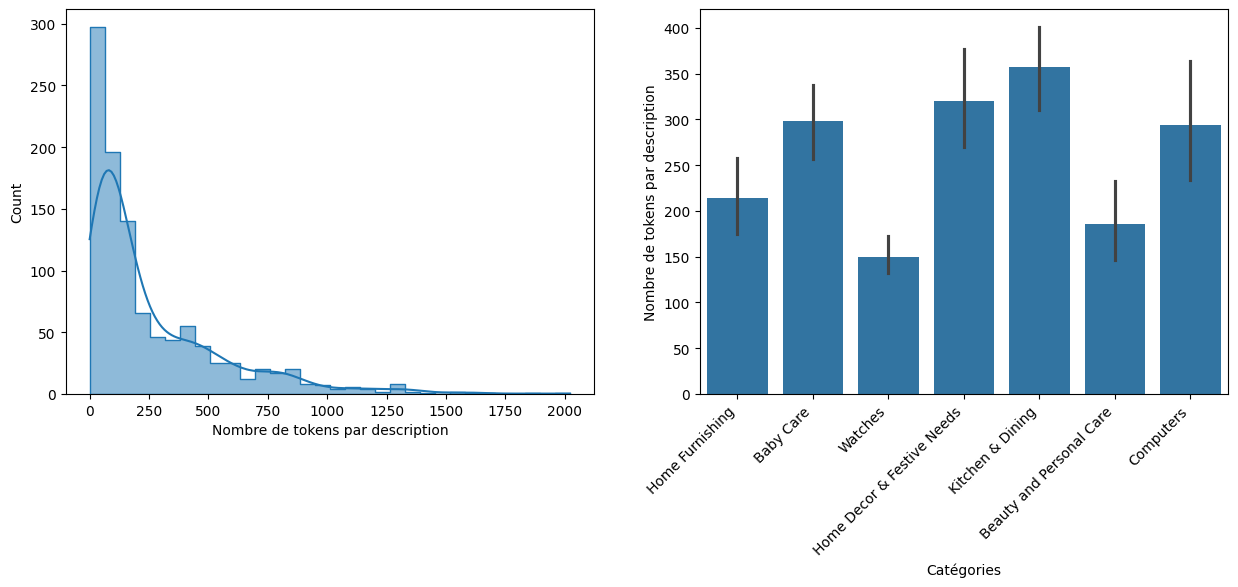

In [25]:
# Analyse du nombre de tokens par description de produit
longueur_tokens = df['sentence_lem'].str.len()

plt.figure(figsize=(15, 5))

# Histogramme du nombre de tokens
plt.subplot(121)
sns.histplot(x=longueur_tokens, kde=True, element="step")
plt.xlabel("Nombre de tokens par description")

# Barplot du nombre de tokens par catégorie
plt.subplot(122)
plot_categ_len = sns.barplot(data=df, x=df['main_category'], y=df['sentence_lem'].str.len())
plt.ylabel("Nombre de tokens par description")
plt.xlabel("Catégories")

plot_categ_len.set_xticklabels(plot_categ_len.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()


In [19]:
df['sentence_lem'].str.len().groupby(df['main_category']).mean()

main_category
Baby Care                     298.200000
Beauty and Personal Care      185.420000
Computers                     294.260000
Home Decor & Festive Needs    320.473333
Home Furnishing               214.053333
Kitchen & Dining              356.893333
Watches                       149.600000
Name: sentence_lem, dtype: float64

In [20]:
# Initialisation d'une liste vide pour les résultats du clustering (modèle, reduction, ARI) :

resultats_ARI = np.empty(shape=[0, 3])

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialiser le CountVectorizer avec les mots vides en anglais
vecteur_compte = CountVectorizer(stop_words='english')

# Spécifier la colonne à utiliser
colonne_features = 'sentence_lem'

# Appliquer le CountVectorizer sur la colonne spécifiée
vecteur_fit = vecteur_compte.fit(df[colonne_features])

# Transformer la colonne pour obtenir la matrice de caractéristiques
matrice_features = vecteur_compte.transform(df[colonne_features])


1. BERT (Bidirectional Encoder Representations from Transformers)
BERT est un modèle de langage basé sur les transformers, développé par Google. Ce modèle est bidirectionnel, ce qui signifie qu'il comprend le contexte des mots en tenant compte de ceux qui se trouvent à la fois avant et après le mot en question. Il est particulièrement performant pour les tâches comme la classification de texte, la réponse à des questions et l'analyse des sentiments.

Avantage : Il capture le sens des mots dans leur contexte de manière plus précise que les modèles traditionnels.

2. Word2Vec
Word2Vec est un modèle qui transforme les mots en vecteurs de nombres dans un espace de grande dimension. Il repose sur l'idée que des mots ayant un sens similaire auront des représentations numériques similaires. Il apprend ces représentations en analysant les contextes dans lesquels les mots apparaissent dans de grandes quantités de texte.

Avantage : Simple et rapide, il capture des relations de similarité entre les mots (par exemple, "roi" et "reine" auront des vecteurs proches).

3. USE (Universal Sentence Encoder)
USE est un modèle conçu pour créer des représentations vectorielles (embeddings) de phrases entières, pas seulement des mots. Il est utile pour comparer des phrases ou des documents en fonction de leur signification. USE peut être utilisé pour des tâches comme la recherche sémantique ou la détection de similarité entre textes.

Avantage : Encode des phrases entières en prenant en compte le sens global de la phrase, pas juste des mots isolés.

4. BoW (Bag of Words)
Le Bag of Words (BoW) est une méthode simple qui représente un texte sous forme de compte des mots. Il ignore la structure grammaticale et ne prend pas en compte l'ordre des mots. Chaque texte est représenté par un vecteur où chaque dimension correspond à la fréquence d'un mot spécifique.



 ## Bag of Words (BoW) Application du Bag of Words

###  ACP BoW sur les catégories rélles 

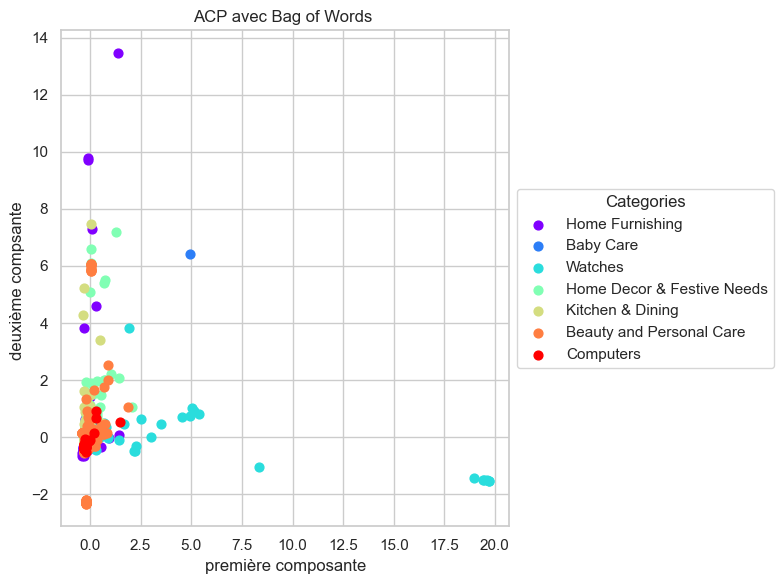

In [35]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot()

X_reduced = PCA(n_components=2).fit_transform(X_array)

# Obtenir les catégories uniques et leur assigner des couleurs
unique_categories = np.unique(y_array)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_categories)))

# Créer un scatter plot pour chaque catégorie
for i, category in enumerate(unique_categories):
    mask = y_array == category
    ax.scatter(
        X_reduced[mask, 0],
        X_reduced[mask, 1],
        c=[colors[i]],
        label=y.unique()[i],  # Utiliser les noms des catégories pour la légende
        s=40,
    )

ax.set_title("ACP avec Bag of Words ")
ax.set_xlabel("première composante")
ax.set_ylabel("deuxième compsante ")

# Ajuster la légende
plt.legend(title="Categories", loc="center left", bbox_to_anchor=(1, 0.5))

# Ajuster la mise en page pour que la légende ne chevauche pas le graphique
plt.tight_layout()
plt.savefig('acp_bagofwords.png')
plt.show()

## ACP ET TSNE sur les Clsuster par kmeans 

### KMeans Bag of Words (BoW)

In [33]:
# Appliquer KMeans
ARI, labels_clusters = kmeans_clustering(matrice_features, df['main_category'])

# Ajouter les résultats ARI dans le tableau des résultats
resultats_ARI = np.append(resultats_ARI, [["CV", "None", ARI]], axis=0)


ARI (Adjusted Rand Index) :  0.1421


### Réduction avec UMAP Bag of Words (BoW)


C:\Users\HSPH9696\AppData\Local\pypoetry\Cache\virtualenvs\opc--SBbjjvv-py3.9\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


ARI (Adjusted Rand Index) :  0.2752


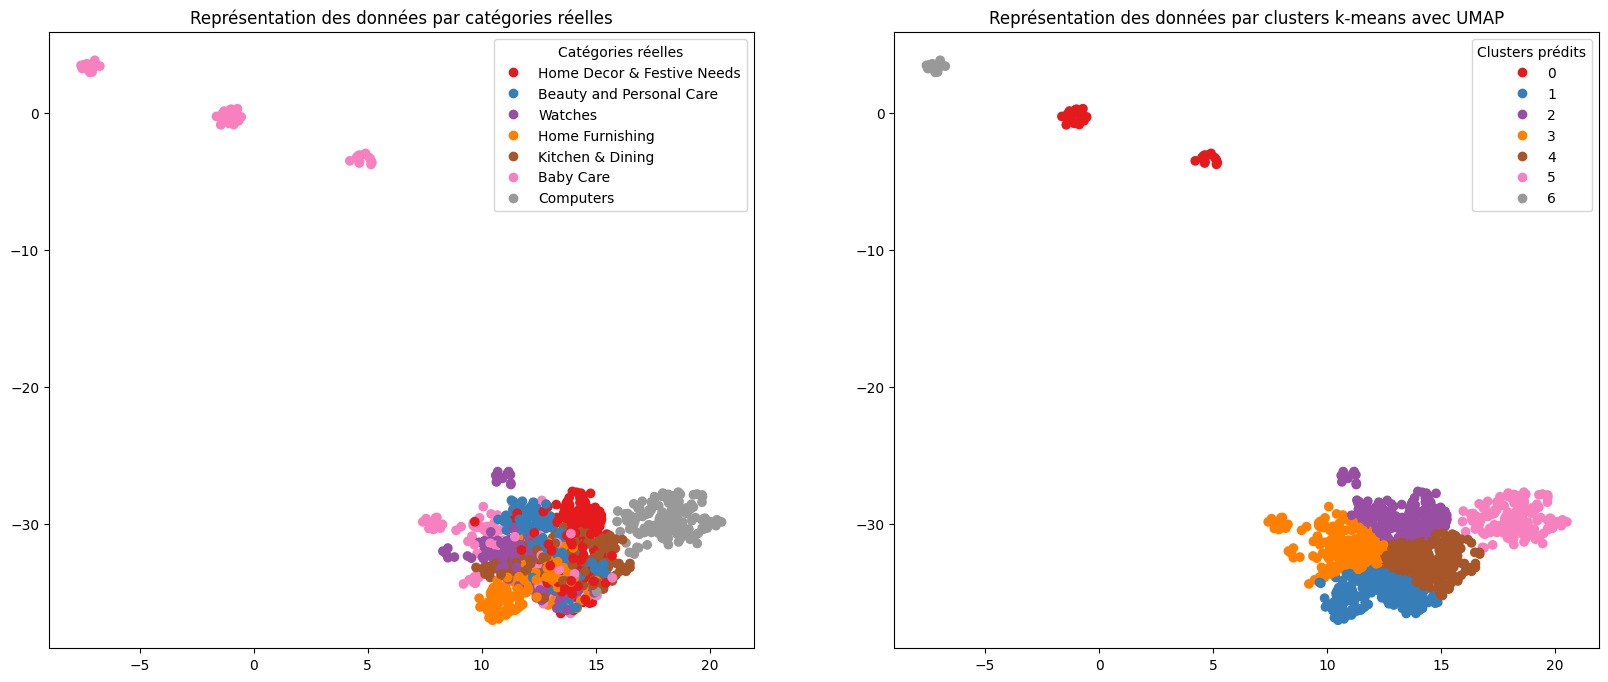

In [47]:
# Réduction avec UMAP
X_reduc = reduce_and_cluster(matrice_features, reduc_method='UMAP')

# Clustering avec KMeans
ARI, labels = kmeans_clustering(X_reduc, df['main_category'])

# Visualisation avec le nom de la méthode
visualize_reduction_and_clusters(X_reduc, df['main_category'], labels, method='UMAP')  # Ajoutez le paramètre 'method'

# Enregistrement des résultats
ARI_results = np.append(ARI_results, [["CV", "UMAP", ARI]], axis=0)


### TSNE  Bag of Words (BoW)

C:\Users\HSPH9696\AppData\Local\pypoetry\Cache\virtualenvs\opc--SBbjjvv-py3.9\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


ARI (Adjusted Rand Index) :  0.388


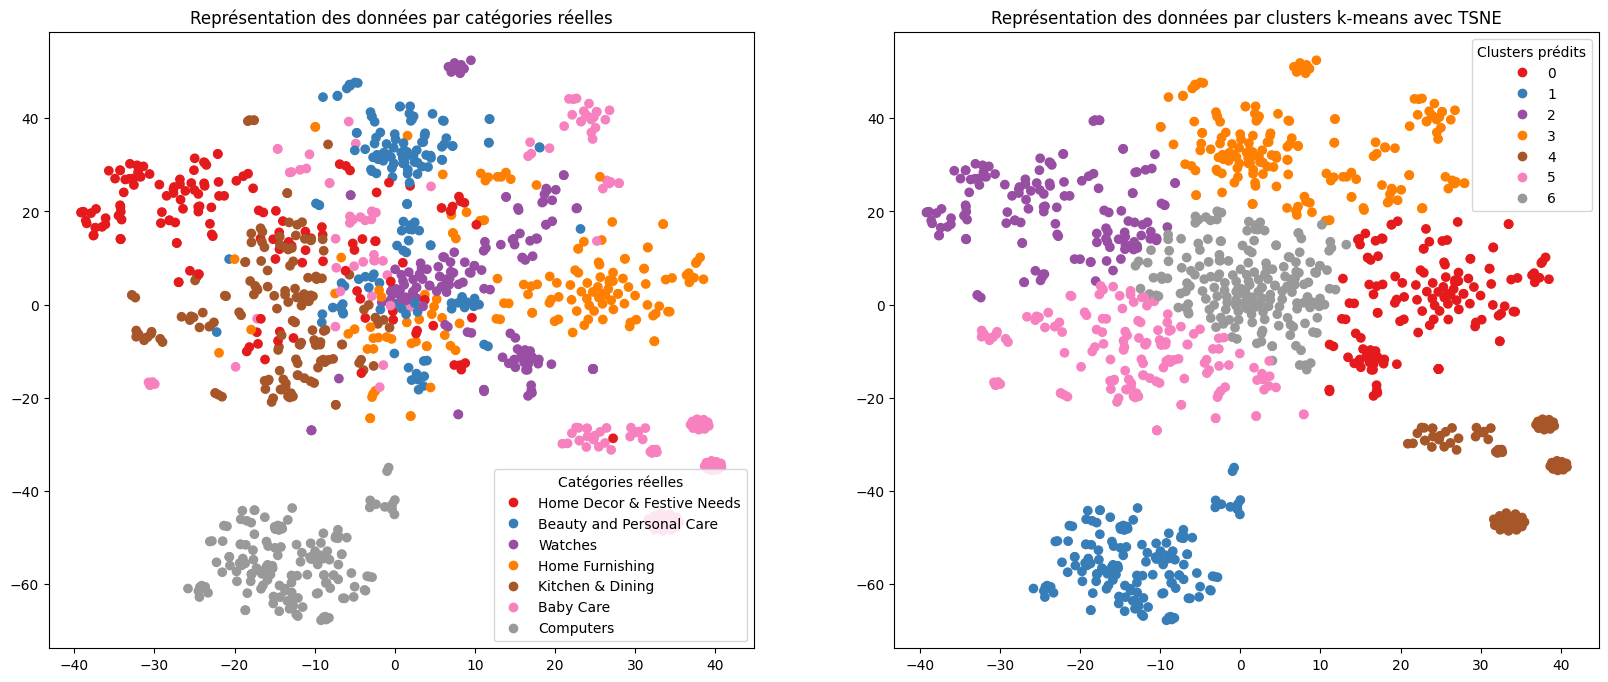

In [46]:
# Réduction avec t-SNE
X_reduc = reduce_and_cluster(matrice_features, reduc_method='TSNE')

# Clustering avec KMeans
ARI, labels = kmeans_clustering(X_reduc, df['main_category'])

# Visualisation avec le nom de la méthode
visualize_reduction_and_clusters(X_reduc, df['main_category'], labels, method='TSNE')  # Ajoutez le paramètre 'method'

# Enregistrement des résultats
ARI_results = np.append(ARI_results, [["CV", "TSNE", ARI]], axis=0)


## TF IDF 

## TF-IDF

Le **TF-IDF** (Term Frequency-Inverse Document Frequency) est une technique couramment utilisée en **NLP (Natural Language Processing)** pour évaluer l'importance d'un mot dans un document, tout en tenant compte de sa fréquence dans l'ensemble des documents.

### Composants :
1. **TF (Term Frequency)** : Il mesure combien de fois un mot apparaît dans un document par rapport à la longueur totale du document. C'est une indication de la fréquence d'un terme dans un texte.
   - Formule :  
   `TF(t) = (Nombre d'occurrences du mot t) / (Nombre total de mots dans le document)`

2. **IDF (Inverse Document Frequency)** : Il mesure l'importance d'un mot à travers plusieurs documents. Un mot très courant dans tous les documents (comme "le", "de", "et") aura une valeur IDF faible, tandis qu'un mot rare aura une IDF plus élevée.
   - Formule :  
   `IDF(t) = log(Nombre total de documents / Nombre de documents contenant le mot t)`

### Fonctionnement :
Le **TF-IDF** est calculé en multipliant ces deux valeurs. Il permet de pondérer les mots en fonction de leur fréquence dans un document et de leur rareté à travers une collection de documents. Cette pondération aide à donner plus de poids aux termes spécifiques (informatifs) d'un texte et moins de poids aux termes communs (non informatifs).

### Utilisation :
TF-IDF est souvent utilisé pour :
- **Représentation vectorielle** des documents (modèle sac de mots pondéré).
- **Recherche d'information** et extraction de mots-clés.
- **Filtrage de texte** pour identifier les mots les plus importants dans un ensemble de données textuelles.

Cette méthode est utile pour le classement des documents et dans des tâches comme la classification, la similarité de documents et la récupération d'information.


### Vectorisation 

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialiser le TfidfVectorizer avec les mots vides en anglais
vecteur_tfidf = TfidfVectorizer(stop_words='english')

# Spécifier la colonne à utiliser
colonne_features = 'sentence_lem'

# Appliquer le TfidfVectorizer sur la colonne spécifiée
tfidf_fit = vecteur_tfidf.fit(df[colonne_features])

# Transformer la colonne pour obtenir la matrice de caractéristiques
matrice_tfidf = vecteur_tfidf.transform(df[colonne_features])


In [51]:
# Appliquer KMeans sur les données transformées avec TF-IDF
ARI, labels = kmeans_clustering(matrice_tfidf, df['main_category'])

# Enregistrer les résultats ARI
ARI_results = np.append(ARI_results, [["TF-IDF", "None", ARI]], axis=0)


ARI (Adjusted Rand Index) :  0.2604


### Réduction UMAP clusterisation  KMeans  pour TF-IDF

C:\Users\HSPH9696\AppData\Local\pypoetry\Cache\virtualenvs\opc--SBbjjvv-py3.9\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


ARI (Adjusted Rand Index) :  0.2729


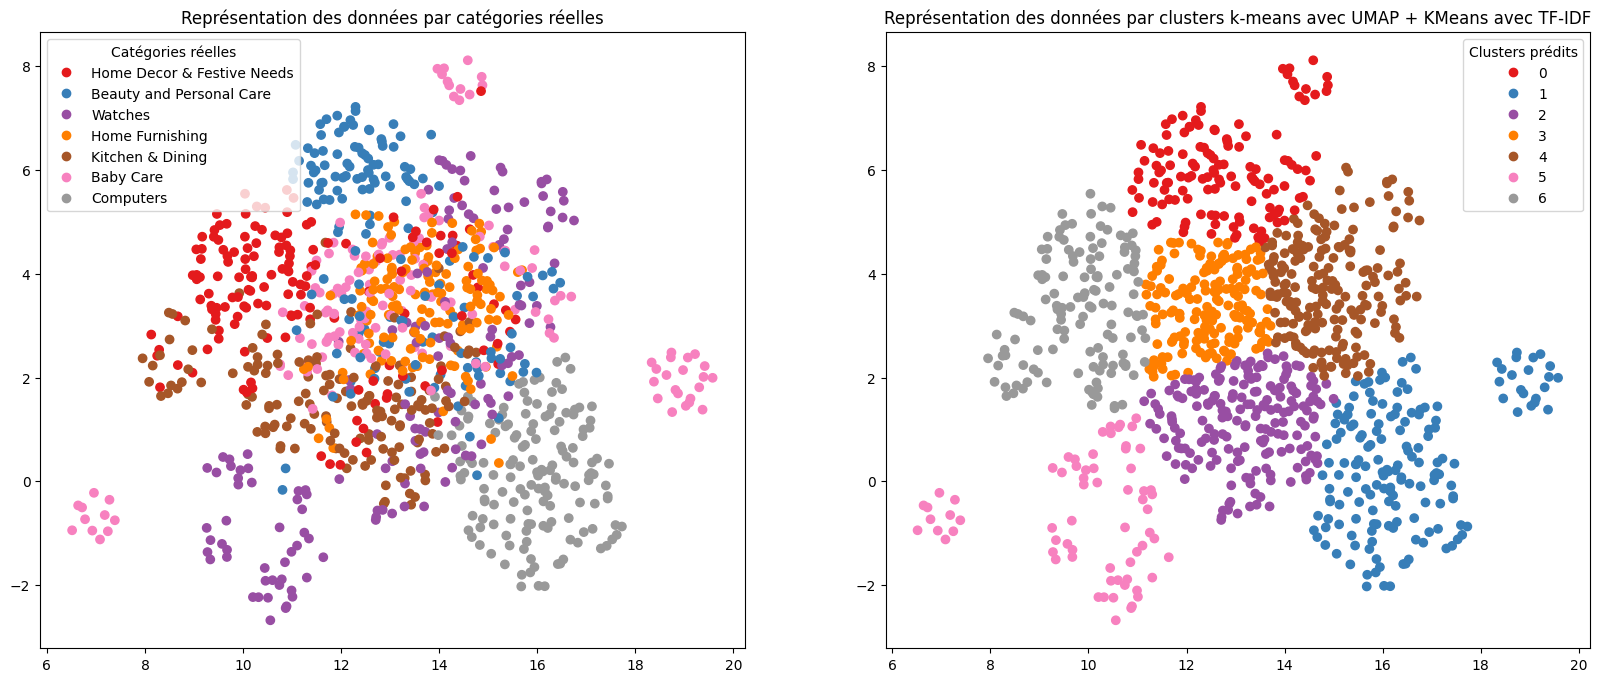

In [52]:

X_reduc = reduce_and_cluster(matrice_tfidf, reduc_method='UMAP')
ARI, labels = kmeans_clustering(X_reduc, df['main_category'])
visualize_reduction_and_clusters(X_reduc, df['main_category'], labels, method='UMAP + KMeans avec TF-IDF')

# Enregistrer les résultats ARI
ARI_results = np.append(ARI_results, [["TF-IDF", "UMAP", ARI]], axis=0)


## Word2Vec

In [40]:
from gensim.models import Word2Vec
from sklearn.decomposition import TruncatedSVD

In [41]:
sentences = [text.split() for text in data['text']]

# Entraîner le modèle Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Transformer les phrases en vecteurs
def get_sentence_vector(sentence, model):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

X = np.array([get_sentence_vector(text, model) for text in data['text']])
y = data['main_category']

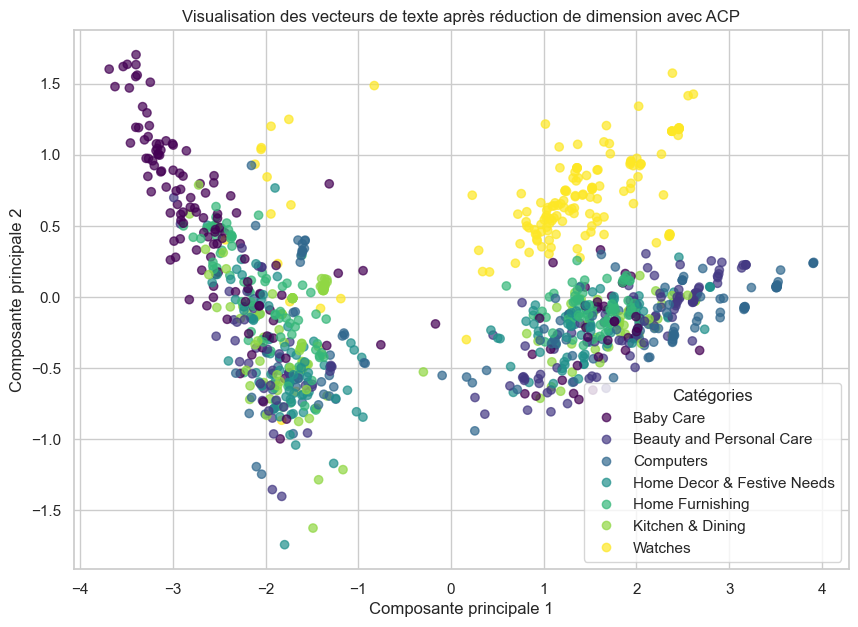

In [50]:
# Réduction de dimension à 2 composantes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Encodage des catégories pour la légende
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
categories = label_encoder.classes_

# Visualisation
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='viridis', alpha=0.7)
plt.title('Visualisation des vecteurs de texte après réduction de dimension avec ACP')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')

# Ajout de la légende
# Utilisation de 'scatter.legend_elements' pour obtenir les handles et labels
handles, _ = scatter.legend_elements()
legend_labels = [categories[i] for i in range(len(categories))]
plt.legend(handles, legend_labels, title="Catégories")

plt.show()

## Bert

In [42]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.decomposition import TruncatedSVD

C:\ProgramData\miniconda3\envs\formation_openC\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [43]:
# Charger le modèle et le tokenizer BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Fonction pour obtenir les embeddings BERT
def get_bert_embeddings(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()


# Obtenir les embeddings BERT pour chaque texte
X = np.array([get_bert_embeddings(text, tokenizer, model) for text in data['text']])
y = data['main_category']



C:\ProgramData\miniconda3\envs\formation_openC\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


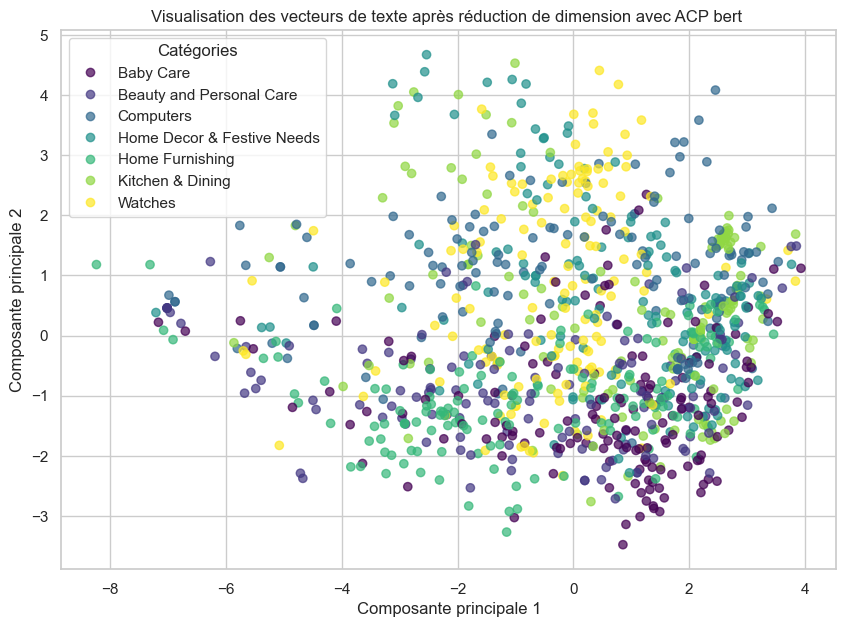

In [44]:
# Réduction de dimension à 2 composantes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Encodage des catégories pour la légende
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
categories = label_encoder.classes_

# Visualisation
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='viridis', alpha=0.7)
plt.title('Visualisation des vecteurs de texte après réduction de dimension avec ACP bert ')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')

# Ajout de la légende
handles, _ = scatter.legend_elements()
legend_labels = [categories[i] for i in range(len(categories))]
plt.legend(handles, legend_labels, title="Catégories")

plt.show()


## USE

In [45]:
import tensorflow_hub as hub

In [2]:
%pwd

'C:\\Users\\HSPH9696\\OPC\\finalp6\\fichier_pro6'

In [46]:


# Charger le modèle USE
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Fonction pour obtenir les embeddings USE
def get_use_embeddings(text, model):
    embeddings = model([text])
    return embeddings.numpy().squeeze()



# Obtenir les embeddings USE pour chaque texte
X = np.array([get_use_embeddings(text, use_model) for text in data['text']])
y = data['main_category']



In [47]:
X.shape

(1011, 512)

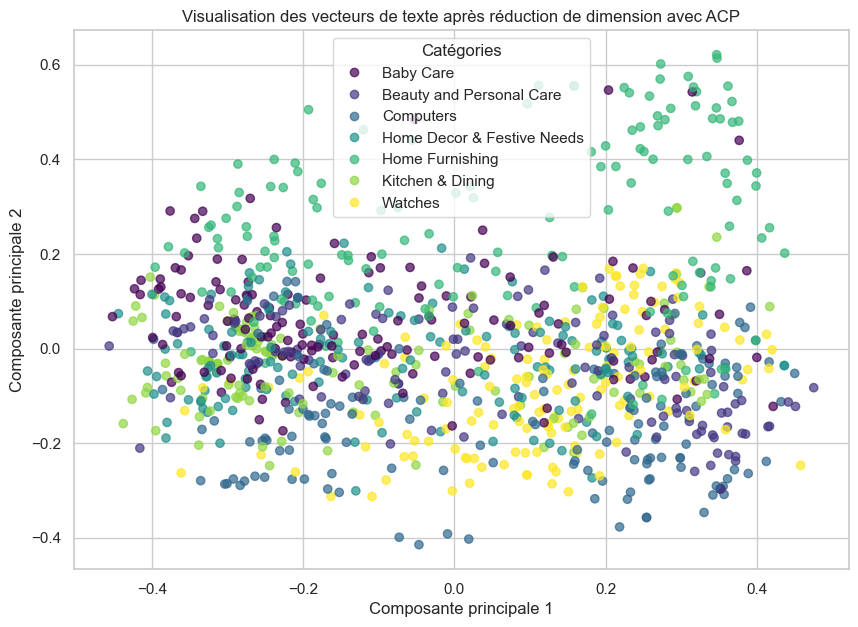

In [48]:
# Réduction de dimension à 2 composantes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Encodage des catégories pour la légende
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
categories = label_encoder.classes_

# Visualisation
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='viridis', alpha=0.7)
plt.title('Visualisation des vecteurs de texte après réduction de dimension avec ACP')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')

# Ajout de la légende
handles, _ = scatter.legend_elements()
legend_labels = [categories[i] for i in range(len(categories))]
plt.legend(handles, legend_labels, title="Catégories")

plt.show()


## AUtomatisation pour les méthodes USE BERT WORD2VEC

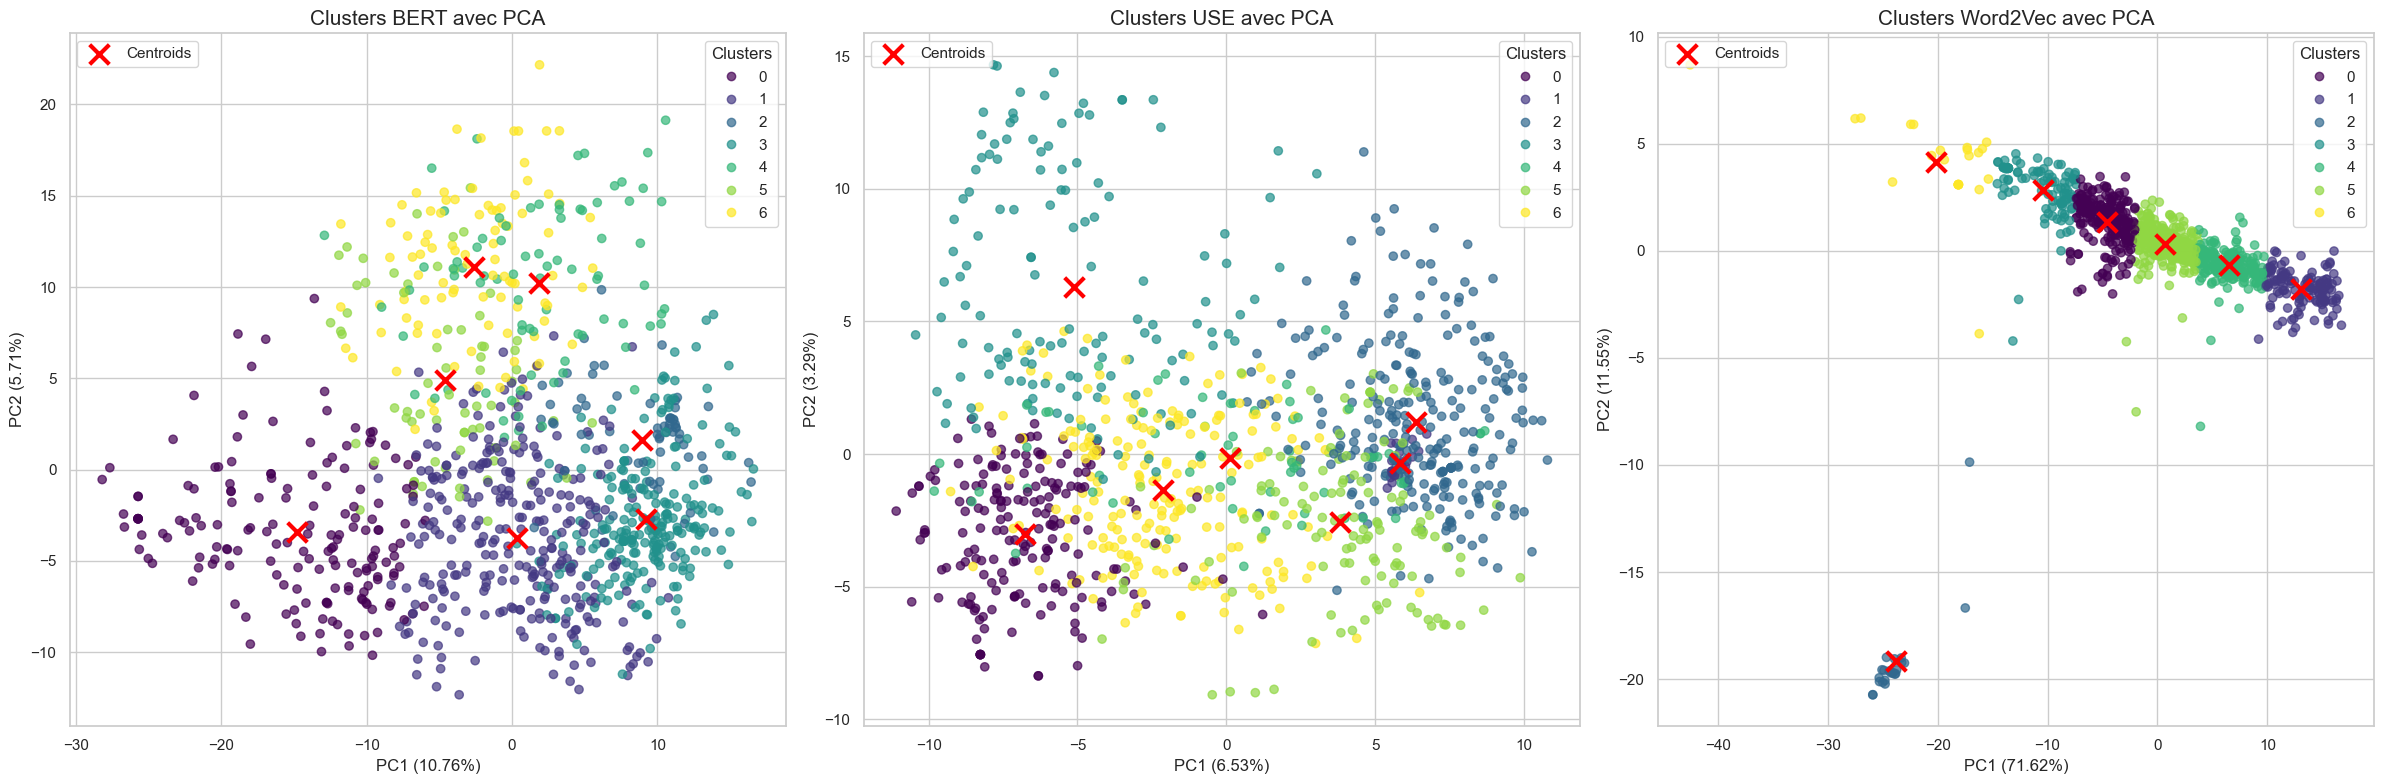

Scores de silhouette:
BERT: 0.0355
USE: 0.0446
Word2Vec: 0.2135


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fonction pour créer le nuage de points
def plot_clusters(X, labels, kmeans, title, ax):
    scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)
    ax.set_title(title, fontsize=15)
    ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%})", fontsize=12)
    ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%})", fontsize=12)
    
    # Ajouter une légende pour les clusters
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
    ax.add_artist(legend1)
    
    # Ajouter les centroids
    centroids_pca = pca.transform(kmeans.cluster_centers_)
    ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
    ax.legend(loc="upper left")

# Créer un subplot pour les trois visualisations
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))

# BERT
pca = PCA(n_components=2)
X_bert_pca = pca.fit_transform(X_bert_scaled)
plot_clusters(X_bert_pca, kmeans_bert.labels_, kmeans_bert, "Clusters BERT avec PCA", ax1)

# USE
pca = PCA(n_components=2)
X_use_pca = pca.fit_transform(X_use_scaled)
plot_clusters(X_use_pca, kmeans_use.labels_, kmeans_use, "Clusters USE avec PCA", ax2)

# Word2Vec
pca = PCA(n_components=2)
X_word2vec_pca = pca.fit_transform(X_word2vec_scaled)
plot_clusters(X_word2vec_pca, kmeans_word2vec.labels_, kmeans_word2vec, "Clusters Word2Vec avec PCA", ax3)

plt.tight_layout()
plt.show()

# Afficher les scores de silhouette
from sklearn.metrics import silhouette_score

print("Scores de silhouette:")
print(f"BERT: {silhouette_score(X_bert_scaled, kmeans_bert.labels_):.4f}")
print(f"USE: {silhouette_score(X_use_scaled, kmeans_use.labels_):.4f}")
print(f"Word2Vec: {silhouette_score(X_word2vec_scaled, kmeans_word2vec.labels_):.4f}")

## classification du texte 

In [56]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier


In [57]:


def classify_and_evaluate(X, y, classifier, method_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    return {
        'Method': method_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }

def compare_methods(data, text_column, label_column='main_category'):
    results = []
    
    # Encoder les étiquettes
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(data[label_column])
    
    # Bag of Words
    vectorizer = CountVectorizer(max_features=5000)
    X_bow = vectorizer.fit_transform(data[text_column])
    
    # TF-IDF
    tfidf_vectorizer = TfidfVectorizer(max_features=5000)
    X_tfidf = tfidf_vectorizer.fit_transform(data[text_column])
    
    # Word2Vec
    sentences = [text.split() for text in data[text_column]]
    w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
    X_w2v = np.array([np.mean([w2v_model.wv[word] for word in text.split() if word in w2v_model.wv]
                               or [np.zeros(100)], axis=0)
                      for text in data[text_column]])
    
    # BERT
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')
    X_bert = []
    for text in data[text_column]:
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        X_bert.append(outputs.last_hidden_state.mean(dim=1).squeeze().numpy())
    X_bert = np.array(X_bert)
    
    # USE
    use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
    X_use = use_model(data[text_column]).numpy()
    
    classifiers = {
        'Naive Bayes': MultinomialNB(),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
    }
    
    for clf_name, clf in classifiers.items():
        if clf_name == 'Naive Bayes':
            results.append(classify_and_evaluate(X_bow, y, clf, f'Bag of Words - {clf_name}'))
            # Pour TF-IDF, on utilise seulement les valeurs positives
            X_tfidf_pos = X_tfidf.copy()
            X_tfidf_pos.data = np.abs(X_tfidf_pos.data)
            results.append(classify_and_evaluate(X_tfidf_pos, y, clf, f'TF-IDF (abs) - {clf_name}'))
        else:
            results.append(classify_and_evaluate(X_bow, y, clf, f'Bag of Words - {clf_name}'))
            results.append(classify_and_evaluate(X_tfidf, y, clf, f'TF-IDF - {clf_name}'))
            results.append(classify_and_evaluate(X_w2v, y, clf, f'Word2Vec - {clf_name}'))
            results.append(classify_and_evaluate(X_bert, y, clf, f'BERT - {clf_name}'))
            results.append(classify_and_evaluate(X_use, y, clf, f'USE - {clf_name}'))
    
    df_results = pd.DataFrame(results)
    
    # Surligner en vert la meilleure méthode pour chaque métrique
    def highlight_max(s):
        is_max = s == s.max()
        return ['background-color: lightgreen' if v else '' for v in is_max]
    
    styled_df = df_results.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    return styled_df



In [58]:
# Utilisation de la fonction
styled_results = compare_methods(data, 'text')
display(styled_results)

C:\ProgramData\miniconda3\envs\formation_openC\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


,Method,Accuracy,Precision,Recall,F1 Score
0,Bag of Words - Naive Bayes,0.866995,0.870065,0.866995,0.866910
1,TF-IDF (abs) - Naive Bayes,0.881773,0.890995,0.881773,0.883105
2,Bag of Words - Random Forest,0.842365,0.882559,0.842365,0.851888
3,TF-IDF - Random Forest,0.847291,0.888475,0.847291,0.857493
4,Word2Vec - Random Forest,0.665025,0.683216,0.665025,0.668254
5,BERT - Random Forest,0.768473,0.777209,0.768473,0.767891
6,USE - Random Forest,0.758621,0.775397,0.758621,0.762982


In [62]:
# Normaliser les embeddings
scaler = StandardScaler()
X_bert_scaled = scaler.fit_transform(X_bert)
X_use_scaled = scaler.fit_transform(X_use)
X_word2vec_scaled = scaler.fit_transform(X_word2vec)

# Nombre de clusters
n_clusters = 7

# K-means avec BERT embeddings
kmeans_bert = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster_bert'] = kmeans_bert.fit_predict(X_bert_scaled)

# K-means avec USE embeddings
kmeans_use = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster_use'] = kmeans_use.fit_predict(X_use_scaled)

# K-means avec Word2Vec embeddings
kmeans_word2vec = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster_word2vec'] = kmeans_word2vec.fit_predict(X_word2vec_scaled)

# Fonction pour afficher les mots les plus proches du centre de chaque cluster
def display_cluster_words(kmeans, embeddings, texts, n_words=10):
    for i in range(n_clusters):
        cluster_texts = [text for text, label in zip(texts, kmeans.labels_) if label == i]
        cluster_embeddings = embeddings[kmeans.labels_ == i]
        centroid = kmeans.cluster_centers_[i]
        distances = np.linalg.norm(cluster_embeddings - centroid, axis=1)
        closest_indices = np.argsort(distances)[:n_words]
        closest_words = [cluster_texts[j].split()[0] for j in closest_indices]  # Prend le premier mot de chaque texte
        print(f"Cluster {i}: {', '.join(closest_words)}")

print("Clusters découverts avec BERT embeddings:")
display_cluster_words(kmeans_bert, X_bert_scaled, data['text'])

print("\nClusters découverts avec USE embeddings:")
display_cluster_words(kmeans_use, X_use_scaled, data['text'])

print("\nClusters découverts avec Word2Vec embeddings:")
display_cluster_words(kmeans_word2vec, X_word2vec_scaled, data['text'])


 

Clusters découverts avec BERT embeddings:
Cluster 0: foolzi, curtain, abstract, self, floral, intellect, hous, spring, floral, anim
Cluster 1: lula, oxolloxo, mkb, upsid, leg, line, mkb, yk, oli, jeg
Cluster 2: rockmantra, abstract, rockmantra, rockmantra, rockmantra, rockmantra, rockmantra, rockmantra, rockmantra, rockmantra
Cluster 3: floral, bourn, servic, surgic, clublaptop, servic, singl, smartpro, smartpro, santosh
Cluster 4: techone+, techone+, transcend, link, pindia, usb, bear, tapawir, green, fastrack
Cluster 5: buddha, wood, prithish, uniqu, divin, asiacraft, ravish, exot, ethnic, art
Cluster 6: lapguard, rega, pavilion, lapguard, cushion, pc-414w, sonata, mac, sonata, edimax

Clusters découverts avec USE embeddings:
Cluster 0: archi, combo, combo, combo, combo, combo, trendnet, router, archi, zyxel
Cluster 1: rockmantra, rockmantra, rockmantra, abstrct, rockmantra, rockmantra, sonakshi, rockmantra, rockmantra, rockmantra
Cluster 2: littl, lula, leg, eleg, sparkl, singl, spa

C:\ProgramData\miniconda3\envs\formation_openC\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\miniconda3\envs\formation_openC\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\miniconda3\envs\formation_openC\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [63]:
data[['cluster_bert','main_category']]

,cluster_bert,main_category
0,3,Home Furnishing
1,1,Baby Care
2,3,Baby Care
3,3,Home Furnishing
4,3,Home Furnishing
...,...,...
1045,3,Baby Care
1046,3,Baby Care
1047,3,Baby Care
1048,1,Baby Care
